# matplotlib.pyplot

**matplotlib.pyplot** is a collection of functions to plot in a similar way to MATLAB. 

While matplotlib is object-oriented, it creates default objects so you can just call .plot() and related functions without explicitly creating figures, subplots, or axes. It will use the current figure/subplot/axes unless you change them. 

Each pyplot function makes some change to a figure: eg, create a figure, create a plotting area in a figure, plot some lines in a plotting area, decorate the plot with labels, etc.... 

### Common imports
The following imports are commonly used for creating plots. The line **%matplotlib inline** causes plots to be output inline, as opposed to popup windows. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt # %pylab
import matplotlib as mpl
%matplotlib inline
import seaborn
seaborn.set()

## plotting 101
If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data in the plot below are [0,1,2,3...97, 98, 99].

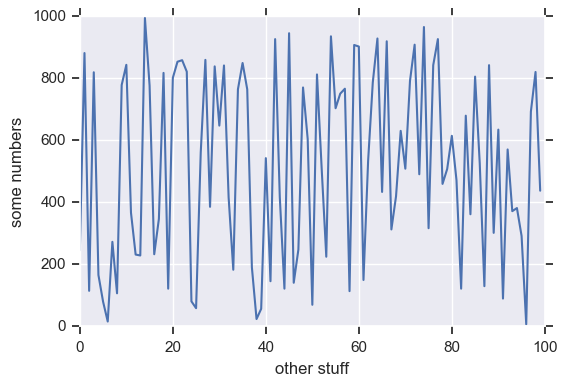

In [4]:
values =  np.random.randint(1,1000,100)
plt.plot(values)
plt.ylabel('some numbers')
plt.xlabel('other stuff')

plot() is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

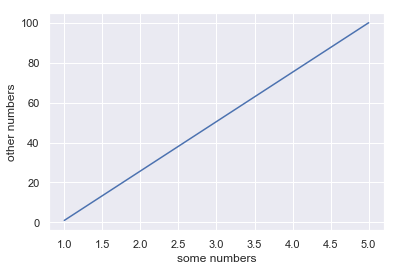

In [5]:
xvals = np.linspace(1.0,5.0,50)
yvals = np.linspace(1,100,50)
plt.plot(xvals, yvals)
plt.xlabel('some numbers')
plt.ylabel('other numbers')
plt.show()

## Styling the plot
For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is ‘b-‘, which is a solid blue line.

You can also use keyword arguments to specify color, line thickness, etc. E.g. plt.plot(x,y,color='red',linewidth=2.0)


*Markers*

{0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 'D': 'diamond', 6: 'caretup', 7: 'caretdown', 's': 'square', 
'|': 'vline', '': 'nothing', 'None': 'nothing', 'x': 'x', 5: 'caretright', '_': 'hline', '^': 'triangle_up', ' ': 'nothing', 
'd': 'thin_diamond', None: 'nothing', 'h': 'hexagon1', '+': 'plus', '*': 'star', ',': 'pixel', 'o': 'circle', '.': 'point', '1': 
'tri_down', 'p': 'pentagon', '3': 'tri_left', '2': 'tri_up', '4': 'tri_right', 'H': 'hexagon2', 'v': 'triangle_down', '8': 'octagon', 
'<': 'triangle_left', '>': 'triangle_right'}

*Colors*

* b: blue
* g: green
* r: red
* c: cyan
* m: magenta
* y: yellow
* k: black
* w: white

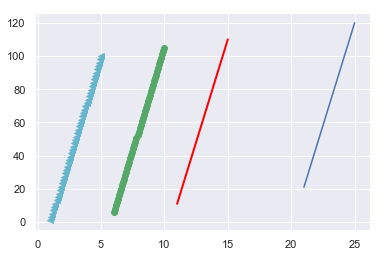

In [6]:
plt.plot(xvals, yvals, 'c<')
plt.plot(xvals + 5, yvals + 5, 'go')
plt.plot(xvals + 10, yvals + 10, color='red', linewidth=2)
plt.savefig('wombat.png')
plt.plot(xvals + 20, yvals + 20)
plt.show()

## Anatomy of a Matplotlib figure

from http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure

![Guido](images/anatomy1.png)

## Working with multiple figures and axes
pyplot has the concept of the current figure and the current axes. All plotting commands apply to the current axes. The function gca() returns the current axes (a matplotlib.axes.Axes instance), and gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don’t have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

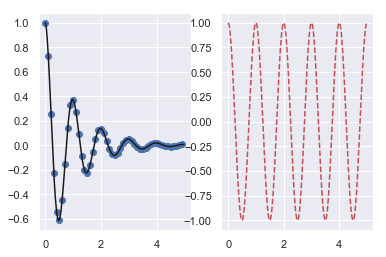

In [7]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1) # select figure 1
plt.subplot(1, 2, 1)   #  1 row, 2 column, Item #1
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(1, 2, 2)   #  1 rows, 2 column, Item #2
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

plt.savefig('awesome.pdf')

/Users/jstrick/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0.5, 1.0, 'Easy as 1,2,3')

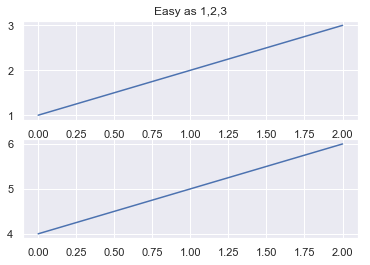

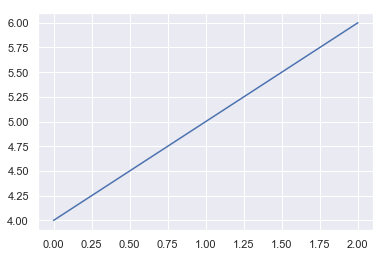

In [8]:
plt.figure(1)                # the first figure
plt.subplot(2,1,1)             # the first subplot in the first figure (rows, cols, curr)
plt.plot([1,2,3])
plt.subplot(212)             # the second subplot in the first figure (rows, cols, curr)
plt.plot([4,5,6])


plt.figure(2)                # a second figure
plt.plot([4,5,6])            # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1,2,3')   # subplot 211 title


More multiple figures. The arguments to add_subplot are (total_rows, total_cols, plot_number). I.e., 3,3,1 is the first cell and 3,3,9 is the last.

[]

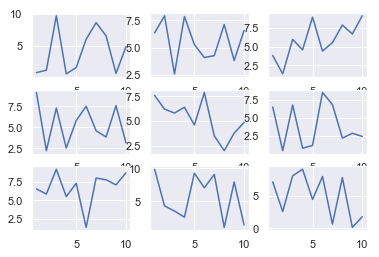

In [9]:
y = np.arange(1,11)
fig = plt.figure()   # get the current figure
for i in range(1,10):
    data = np.random.random_sample((10,)) * 10
    sub = fig.add_subplot(3,3,i)
    sub.plot(y, data)
# fig.savefig('multiplot.pdf', format='pdf')
plt.plot()

## Working with text
The text() command can be used to add text in an arbitrary location, and the xlabel(), ylabel() and title() are used to add text in the 
indicated locations.

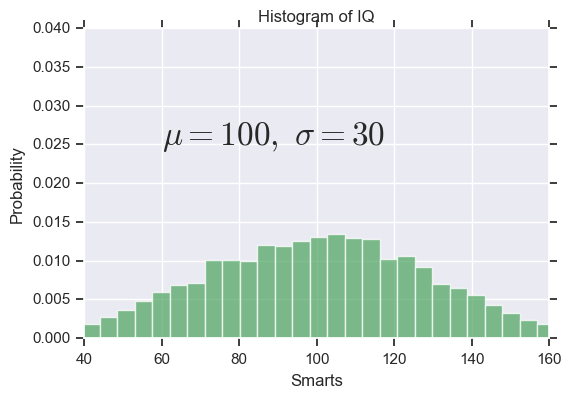

In [8]:
mu, sigma = 100, 30
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu={},\ \sigma={}$'.format(mu, sigma), fontsize=24)
plt.axis([40, 160, 0, 0.04])
plt.grid(True)

## Annotations
A common use case of text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

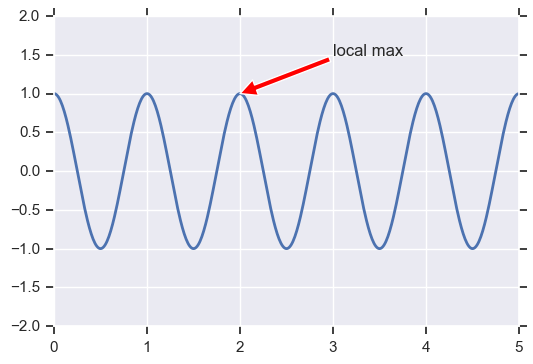

In [11]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
          arrowprops=dict(facecolor='red'),
            )

plt.ylim(-2,2)
plt.savefig('annotation.pdf')
plt.show()


## Matplotlib styles

matplotlib has several builtin styles, and seaborn adds many more. You can also define your own matplotlib stylesheets. See https://matplotlib.org/users/style_sheets.html for more info.

In [12]:
plt.style.available

['fivethirtyeight',
 'bmh',
 'seaborn-ticks',
 'seaborn-pastel',
 'seaborn-talk',
 'seaborn-white',
 'seaborn-muted',
 'grayscale',
 'seaborn-whitegrid',
 'seaborn-deep',
 'seaborn-paper',
 'seaborn-poster',
 'seaborn-darkgrid',
 'seaborn-colorblind',
 'seaborn-notebook',
 'ggplot',
 'dark_background',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-dark',
 'classic']

## Temporary styling
plt.style has context manager that will use a style temporarily, just within the scope of the **with** block. 

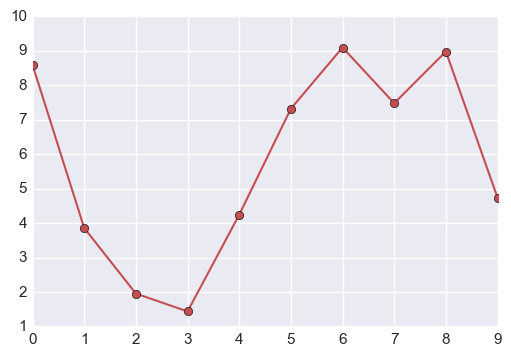

In [13]:
data = np.random.random_sample((10,)) * 10
with plt.style.context('seaborn-darkgrid'):  # will not affect other plots later in this notebook
    plt.plot(data, 'r-o')

##  fivethirtyeight style example
The style **fivethirtyeight** creates a plot in the style of http://fivethirtyeight.com

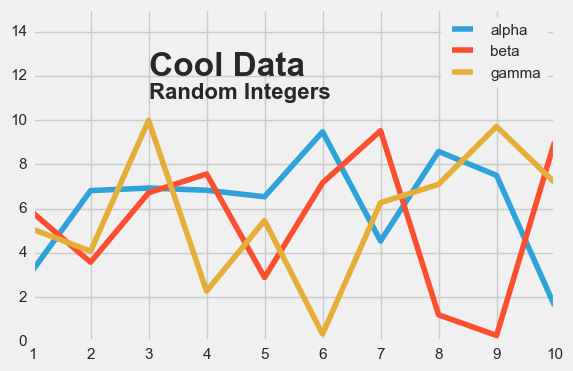

In [14]:
with plt.style.context('fivethirtyeight'):
    titles = ['alpha', 'beta', 'gamma'] 

    y = np.arange(1, 11)
    for title in titles:
        data = np.random.random_sample((10,)) * 10
        plt.plot(y, data, label=title)
    plt.ylim(0, 15)
    plt.legend(loc="upper right")
    plt.text(x=3, y=12, weight='bold', s="Cool Data", fontsize=24)
    plt.text(x=3, y=11, weight='bold', s="Random Integers", fontsize=16)
    plt.show()


## Custom styles
You can put custom style settings in a file (extension .mplstyle) and load it with the style.use() or style.context() functions. 

The location for custom styles is the **stylelib** folder under your personal matplotlib config folder. To find what matplotlib is using for the config folder, call **.get_configdir()**. 

For Windows, the config directory is usually under your "home directory", which is stored in the environment variable **%USERPROFILE%**. For Linux or MacOS, the config directory is either ~/.matplotlib (older versions of MPL) or ~/.config/matplotlib (newer versions). 


**\>>> import matplotlib as mpl<br/>
\>>> mpl.get_configdir()<br/>
'C:\\Users\\_username_\\.matplotlib'**


#### NOTE 
_to make the following code work, copy **mycustom.mplstyle** from the top level of the student files to **CONFIGDIR**/stylelib, as described in the previous section. You will also need to create the **.matplotlib/stylelib** folders._

In [15]:
with plt.style.context('mycustom'):
    data = np.random.random_sample((10,)) * 10
    y = np.arange(1, 11)
    plt.title("My Data")
    plt.plot(y, data)


OSError: 'mycustom' not found in the style library and input is not a valid URL or path. See `style.available` for list of available styles.

## Histograms

/Users/jstrick/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  """


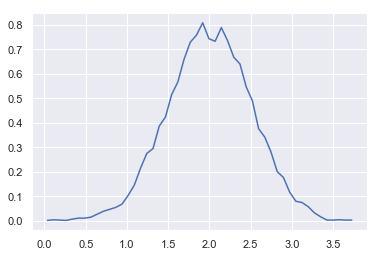

/Users/jstrick/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


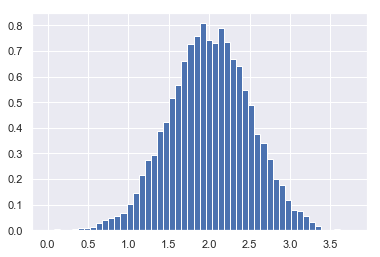

In [16]:
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,10000)
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=50, normed=True)  # NumPy version (no plot)
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=50, normed=1)       # matplotlib version (plot)
plt.show()

## Pie charts
Use **plt.pie()**, pass in data + config options. You can set which slices 'explode', or pop out, and set the colors individually. 

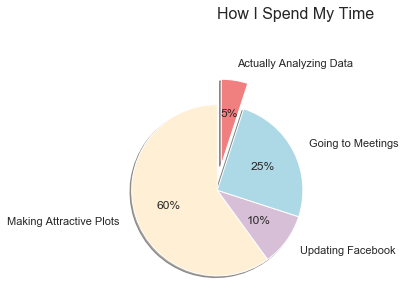

In [17]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Making Attractive Plots', 'Updating Facebook', 'Going to Meetings', 'Actually Analyzing Data'
sizes = [60, 10, 25, 5]
colors = ['papayawhip', 'thistle', 'lightblue', 'lightcoral']
explode = (0, 0, 0, 0.3) # make 4th slice 'explode'

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.0f%%', shadow=True, startangle=90, labeldistance=1.2)
# Set axis (aspect ratio) to 'equal' so pie is drawn flat
plt.axis('equal')
plt.text(0, 2, "How I Spend My Time", fontsize=16)
#plt.show()
plt.savefig('/tmp/piechart.pdf', format='pdf')

<!-- 
TODO:
Add more plot types
-->